In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense 
from tensorflow.keras.optimizers import Adam 
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [8]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
class_names = ['airplane','automobile','bird','cat','dog','donkey','frog','horse','ship','truck']


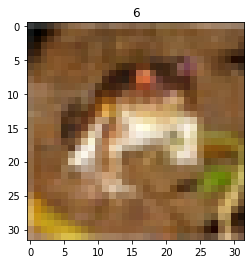

In [9]:
plt.imshow(X_train[0])
plt.title(y_train[0][0])
plt.show()

In [10]:
def create_model():
    model = Sequential([
        Conv2D(16,(5,5),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(6, (5,5), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(120,activation='relu'),
        Dropout(0.5),
        Dense(84,activation='relu'),
        Dense(10,activation='softmax')
    ])

    return model

In [11]:
model = create_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 20s 30ms/step - loss: 1.8767 - accuracy: 0.3056 - val_loss: 1.5994 - val_accuracy: 0.4101
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 1.6139 - accuracy: 0.4076 - val_loss: 1.4971 - val_accuracy: 0.4529
Epoch 3/10
625/625 [==============================] - 17s 28ms/step - loss: 1.5316 - accuracy: 0.4372 - val_loss: 1.4962 - val_accuracy: 0.4434
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 1.4797 - accuracy: 0.4562 - val_loss: 1.4317 - val_accuracy: 0.4704
Epoch 5/10
625/625 [==============================] - 18s 28ms/step - loss: 1.4312 - accuracy: 0.4751 - val_loss: 1.3671 - val_accuracy: 0.5001
Epoch 6/10
625/625 [==============================] - 16s 26ms/step - loss: 1.3960 - accuracy: 0.4938 - val_loss: 1.3341 - val_accuracy: 0.5210
Epoch 7/10
625/625 [==============================] - 17s 27ms/step - loss: 1.3676 - accuracy: 0.5049 - val_loss: 1.3398 - val_accuracy:

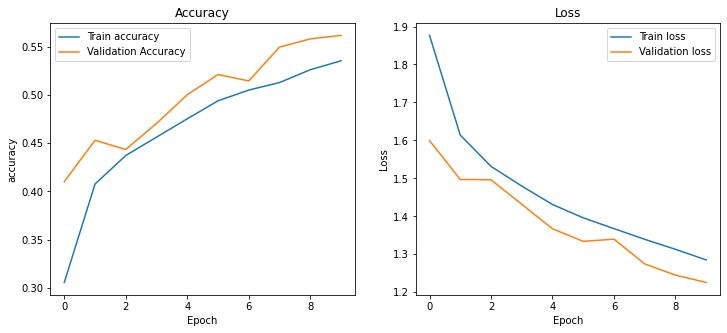

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test loss {test_loss}')
print(f'Test accuracy {test_acc}')


313/313 [==============================] - 2s 6ms/step - loss: 1.2277 - accuracy: 0.5582
Test loss 1.22774076461792
Test accuracy 0.5582000017166138


313/313 [==============================] - 2s 6ms/step


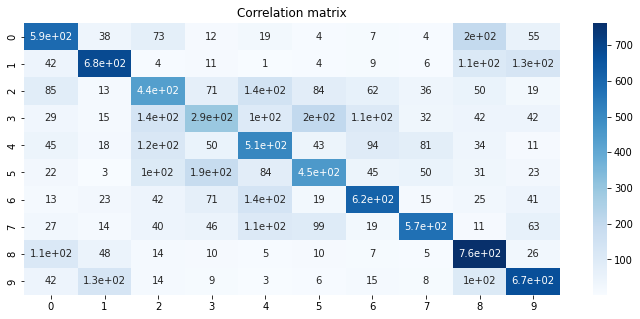

In [18]:
y_pred = np.argmax(model.predict(X_test),axis=-1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,5))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('Correlation matrix')
plt.show()